In [1]:
import cv2
import path
import matplotlib.pyplot as plt
import numpy as np

## Read img file

In [10]:
img_files = path.Path('./data').glob('*')
print(img_files)
imgs = list(map(lambda x:cv2.imread(str(x), cv2.COLOR_RGB2GRAY),img_files))

[Path('./data\\1.jpg')]


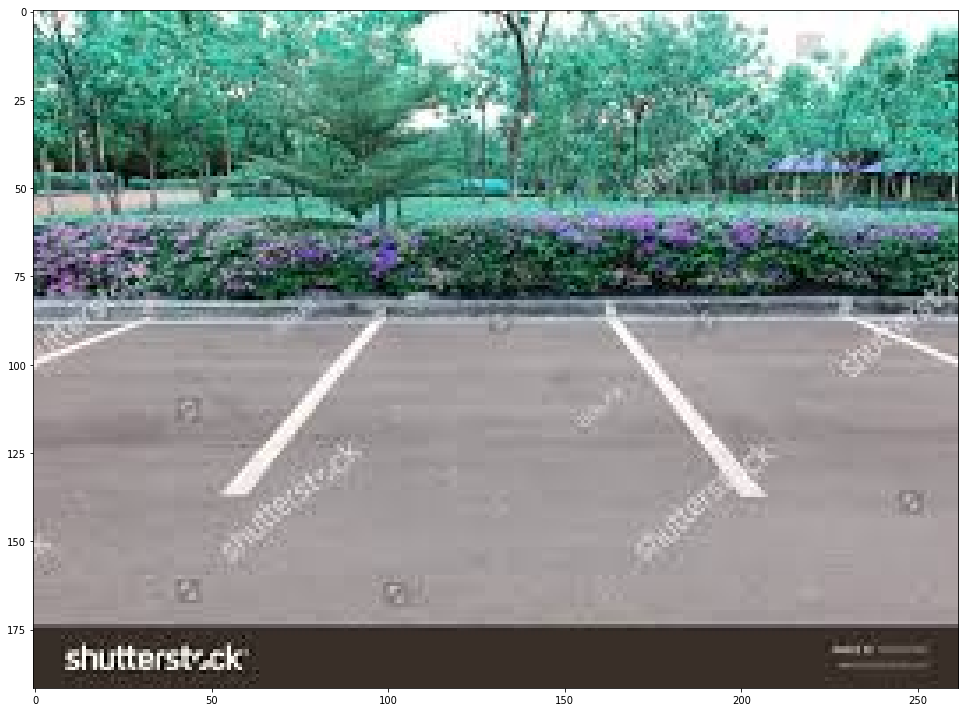

In [11]:
fig = plt.figure(figsize=(20,10)) # rows*cols 행렬의 i번째 subplot 생성
cols = len(img_files)
for idx,img in enumerate(imgs):
    ax = fig.add_subplot(1, cols, idx+1)
    ax.imshow(img)
fig.tight_layout()

In [122]:
def gaussian_blur(img, kernel_size): # 가우시안 필터
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def show_image(img,rows,cols):
    
    fig = plt.figure(figsize=(20,10)) # rows*cols 행렬의 i번째 subplot 생성
    start = 100
    diff = 100

    for i in range(1,rows*cols+1):
        min_thresh = start*i
        max_thresh = min_thresh+diff
        blur_img = gaussian_blur(img, 3) # Blur 효과
        edges = cv2.Canny(blur_img,min_thresh,max_thresh)
        ax = fig.add_subplot(rows, cols, i)
        ax.set_title('min: %d , max: %d'%(min_thresh,max_thresh))
        ax.imshow(edges)
        
    fig.tight_layout() 

<Figure size 432x288 with 0 Axes>

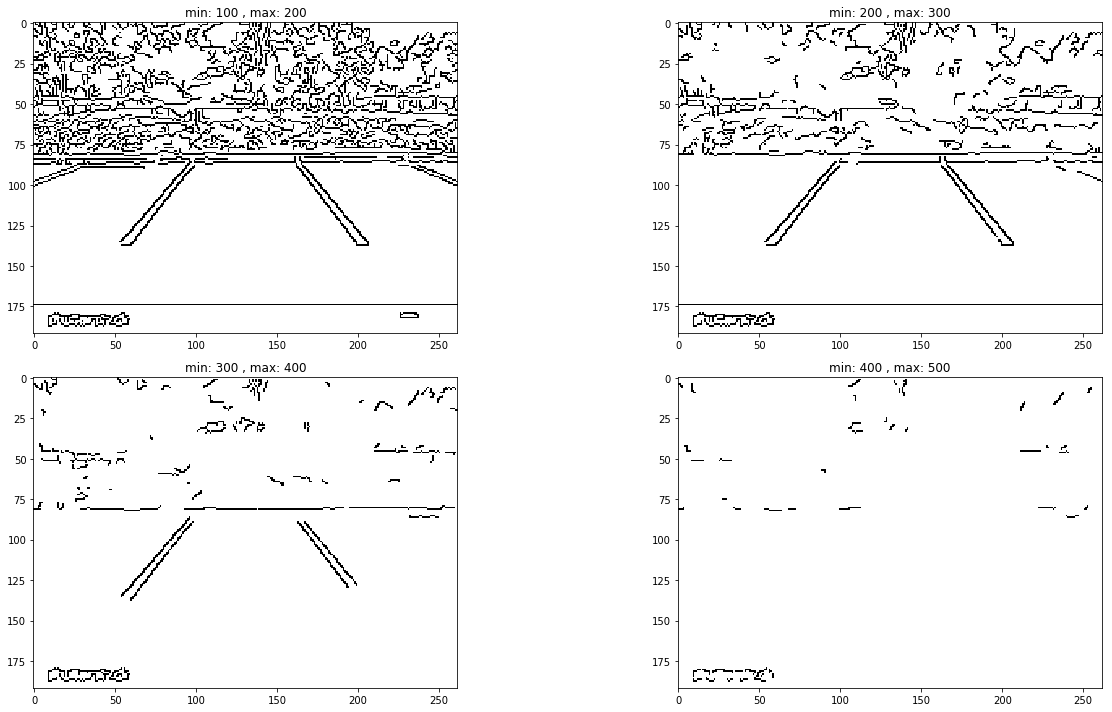

In [123]:
plt.set_cmap('Greys')
show_image(imgs[0],2,2)

## Hough Transform
- [reference](https://m.blog.naver.com/windowsub0406/220894462409)

In [124]:
img = imgs[0]

def draw_lines(img, lines, color=[0, 255, 255], thickness=5): # 선 그리기
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)
            
def houghLines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold,np.array([]),minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

def weighted_img(img, initial_img, α=1, β=1., λ=0.): # 두 이미지 operlap 하기
    return cv2.addWeighted(initial_img, α, img, β, λ)


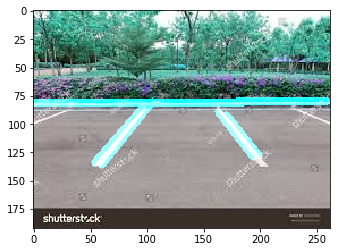

In [125]:
blur_img = gaussian_blur(img, 3) # Blur 효과
cannyImg = cv2.Canny(blur_img,300,400)
houghImg = houghLines(cannyImg,1, 1 * np.pi/180, 50, 10, 20) 
result = weighted_img(houghImg,img)
plt.imshow(result)